## Урок 5
### Элементы теории вероятностей

In [1]:
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt

__Задание 1__  
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
# Roulette: 36 numbers (18 red and 18 black) and Zero
red = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
black = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}
zero = 0

for i in range(0, 5):
    roll = input()    
    spin = np.random.randint(0, 37)
    if spin in red:
        print("Your spin: ", spin, " Red")
    elif spin in black:
        print("Your spin: ", spin, " Black")
    elif spin == zero:
        print("Your spin is Zero!")

Your spin:  20  Black


Your spin:  33  Black


Your spin:  30  Red


Your spin:  16  Red


Your spin:  10  Black


__Задание 2__  
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.  
2) Сгенерируйте десять выборок случайных чисел `х0, …, х9` и постройте гистограмму распределения случайной суммы `х0 + х1 + … + х9`.

Total probabiity of pairwise disjoint events:
$$P = P_{head} + P_{tail} = 1$$

In [3]:
# Monte Carlo method with a coin (one side is the Head, another side is the Tail)
head, tail = 0, 0
n = 1000
for i in range(0, n):
    x = np.random.uniform(0, 10)
    if x < 5:
        head = head + 1
    else: 
        tail = tail + 1
print(f'Number of experiments: {n} \nHeads: {head} \nTails: {tail} \nP(Heads): {head/n} \nP(Tails): {tail/n} \nP(Heads+Tails): {head/n + tail/n}')

Number of experiments: 1000 
Heads: 492 
Tails: 508 
P(Heads): 0.492 
P(Tails): 0.508 
P(Heads+Tails): 1.0


In [4]:
# Generate 10 arrays of random numbers
# Calculate array x as sum of arrays x0, x1, ... , x9
n = 20000
x_sum = [0] * n
for i in range(0, 10):        
    xn = f'x{i}'
    xn = np.random.rand(n)
    print("Generated array", f'x{i}')
    x_sum = x_sum + xn
    i += 1
print("Array x_sum is calculated as a sum of arrays x0, x1, ... , x9")

Generated array x0
Generated array x1
Generated array x2
Generated array x3
Generated array x4
Generated array x5
Generated array x6
Generated array x7
Generated array x8
Generated array x9
Array x_sum is calculated as a sum of arrays x0, x1, ... , x9


Text(0.5, 1.0, 'Histogram')

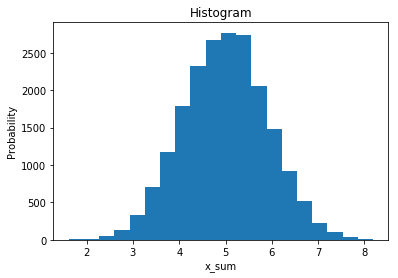

In [5]:
num_bins = 20
n, bins, patches = plt.hist(x_sum, num_bins)
plt.xlabel('x_sum')
plt.ylabel('Probability')
plt.title('Histogram')

__Задание 3__  
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.  
2) Повторите расчеты биномиальных коэффициентов и вероятностей `k` успехов в последовательности из `n` независимых испытаний, взяв другие значения `n` и `k`.


Binomial Distribution. 
Bernoulli experiment with `n` independent trials:
$$P_n(k) = C_n^k \cdot p^k \cdot q^{n - k}$$
Combinations:
$$C_n^k = \frac{n!}{k! \: (n - k)!}$$

In [6]:
k, n = 0, 1000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

385 1000 0.385


In [7]:
k, n = 2, 4
p = 0.5 # success probability
q = 1 - p # failure probability

# Binomial coefficient (calculated as combinations)
C = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# Probability
P_nk = C * (p ** k) * (q ** (n - k))
P_nk

0.375

__Задание 4__  
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений `n` и `k`.

Permutations:
$$P_n = n!$$

Arrangements:
$$A_n^k = \frac{n!}{(n - k)!}$$

Combinations:
$$C_n^k = \frac{n!}{k! \: (n - k)!}$$

In [8]:
n = 3 # a, b, c

In [9]:
# Permutations
k = n
for p in itertools.permutations("abc", k):
    print(''.join(str(x) for x in p))

abc
acb
bac
bca
cab
cba


In [10]:
# Permutations by formula
math.factorial(n)

6

In [11]:
# Arrangements
k = 2
for p in itertools.permutations("abc", k):
    print(''.join(str(x) for x in p))

ab
ac
ba
bc
ca
cb


In [12]:
# Arrangements by formula
math.factorial(n) // math.factorial(n - k)

6

In [13]:
# Combinations
k = 2
for p in itertools.combinations("abc", k):
    print(''.join(p))

ab
ac
bc


In [14]:
# Combinations by formula
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

3

__Задание 5__  
Дополните код расчетом коэффициента корреляции `x` и `y` по формуле:
$$R = \frac{\sum(x_i - x_m) \cdot (y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2 \cdot \sum(y_i - y_m)^2}}$$

Coefficients of a linear regression equation:

$$a = \frac{\sum{x_i}\sum{y_i} - n \sum{x_i y_i}}{{(\sum{x_i})^2} - n \sum{x_i}^2}$$

$$b = \frac{\sum{y_i} - a \sum{x_i}}{n}$$

Coefficients of the linear regression equation:
0.6607218740998821 0.16968856315280476  (by formula)
0.6607218740998809 0.16968856315280564  (using built-in functions)


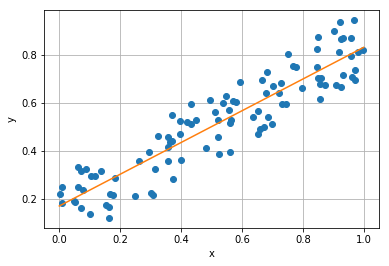

In [15]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Calculate coefficients a and b by formula
a = (np.sum(x) * np.sum(y) - n * np.sum(x*y)) / (np.sum(x) * np.sum(x) - n * np.sum(x*x))
b = (np.sum(y) - a * np.sum(x)) / n

# Calculate coefficients a and b using built-in functions
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]

print("Coefficients of the linear regression equation:")
print(a, b, " (by formula)")
print(a1, b1, " (using built-in functions)")

plt.plot([0, 1], [b, a + b])
plt.show()

In [16]:
# Calculate correlation coefficient by formula
x_mean = np.sum(x) / n
y_mean = np.sum(y) / n
R_xy = np.sum((x - x_mean) * (y - y_mean)) / math.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))

# Calculate correlation coefficient using built-in function
R_xy_mtrx = np.corrcoef(x, y)
R_xy_mtrx

array([[1.        , 0.92065871],
       [0.92065871, 1.        ]])

In [17]:
print("Correlation coefficient:")
print(R_xy, " (by formula)")
print(R_xy_mtrx[0, 1], " (using built-in functions)")

Correlation coefficient:
0.9206587097975387  (by formula)
0.9206587097975378  (using built-in functions)
